In [1]:
# !pip3 install tira ir_datasets python-terrier

In [2]:
import pandas as pd
import pyterrier as pt
from tira.rest_api_client import Client
from tira.third_party_integrations import ensure_pyterrier_is_loaded
from tqdm import tqdm

ensure_pyterrier_is_loaded()
tira = Client()

PyTerrier 0.10.0 has loaded Terrier 5.7 (built by craigm on 2022-11-10 18:30) and terrier-helper 0.0.7

No etc/terrier.properties, using terrier.default.properties for bootstrap configuration.


# First, Example for a single dataset

In [3]:
dataset = 'antique-test-20230107-training'
pt_dataset = pt.get_dataset(f"irds:ir-benchmarks/{dataset}")

pt_dataset.get_topics('query').head()

,qid,query
0,3990512,how can we get concentration onsomething
1,714612,why doesn t the water fall off earth if it s r...
2,2528767,how do i determine the charge of the iron ion ...
3,821387,i have mice how do i get rid of them humanely
4,1880028,what does see leaflet mean on ept pregnancy test


In [4]:
bm25 = tira.pt.from_submission('ir-benchmarks/tira-ir-starter/BM25 Re-Rank (tira-ir-starter-pyterrier)', dataset)
qpp_predictions = tira.pt.transform_queries('ir-benchmarks/qpptk/all-predictors', dataset)

In [5]:
qpp_predictions(pt_dataset.get_topics('query').head())

,qid,query,max-idf,avg-idf,scq,max-scq,avg-scq,var,max-var,avg-var,...,smv+50,clarity+50+100,wig+100,nqc+100,smv+100,clarity+100+100,wig+1000,nqc+1000,smv+1000,clarity+1000+100
0,3990512,how can we get concentration onsomething,11.116584,7.046932,154.548142,48.116900,38.637036,11.621307,6.724458,1.936884,...,0.030120,3.795747,1.823258,0.039069,0.035748,3.731287,0.972405,0.019728,0.010170,3.389977
1,714612,why doesn t the water fall off earth if it s r...,12.215196,7.627986,380.326020,47.708207,38.032602,15.536635,5.230969,1.294720,...,0.004710,4.267368,1.538839,0.011142,0.008922,4.106367,0.695940,0.009800,0.006195,3.815700
2,2528767,how do i determine the charge of the iron ion ...,12.908343,8.712145,442.767537,52.221022,40.251594,20.639520,3.725044,1.876320,...,0.016734,4.314736,2.091532,0.017572,0.015034,4.305586,0.928886,0.012062,0.007967,4.294343
3,821387,i have mice how do i get rid of them humanely,12.908343,8.890641,340.263514,50.394187,37.807057,11.381356,2.897810,1.138136,...,0.021428,3.532815,2.210218,0.021395,0.017602,3.516496,0.805009,0.015333,0.010520,3.508216
4,1880028,what does see leaflet mean on ept pregnancy test,12.908343,6.848213,339.046657,49.747516,37.671851,11.333447,3.290287,1.259272,...,0.011415,4.770863,1.538375,0.016755,0.011784,4.750485,0.881017,0.009732,0.005666,4.640350


In [6]:
df_eval = pt.Experiment([bm25], pt_dataset.get_topics('query'), pt_dataset.get_qrels(), names=['BM25'],
                        eval_metrics=['ndcg_cut.10'], perquery=True)
df_eval

,name,qid,measure,value
70,BM25,100653,ndcg_cut.10,0.428160
85,BM25,1015624,ndcg_cut.10,0.580570
43,BM25,1017690,ndcg_cut.10,0.754357
116,BM25,1035857,ndcg_cut.10,0.652168
122,BM25,103830,ndcg_cut.10,0.530858
...,...,...,...,...
19,BM25,851124,ndcg_cut.10,0.545156
95,BM25,896725,ndcg_cut.10,0.360260
104,BM25,922849,ndcg_cut.10,0.498273
178,BM25,949154,ndcg_cut.10,0.664721


In [7]:
# now with all qpp predictions
qpp_predictions(df_eval)

,name,qid,measure,value,max-idf,avg-idf,scq,max-scq,avg-scq,var,...,smv+50,clarity+50+100,wig+100,nqc+100,smv+100,clarity+100+100,wig+1000,nqc+1000,smv+1000,clarity+1000+100
70,BM25,100653,ndcg_cut.10,0.428160,12.908343,9.051803,598.373506,50.637838,37.398344,23.617904,...,0.014273,3.544082,1.951133,0.016508,0.009057,3.544058,0.745923,0.009943,0.006240,3.544040
85,BM25,1015624,ndcg_cut.10,0.580570,12.908343,8.369403,280.338094,50.578374,40.048299,9.523332,...,0.011114,3.999061,1.929926,0.018038,0.013737,3.935562,1.029481,0.012135,0.007093,3.716341
43,BM25,1017690,ndcg_cut.10,0.754357,12.215196,7.912693,283.592656,49.248037,40.513237,8.418207,...,0.013975,3.511534,1.571078,0.018584,0.015681,3.456468,0.938830,0.009677,0.004896,3.187760
116,BM25,1035857,ndcg_cut.10,0.652168,10.135754,7.745829,367.762077,50.625796,45.970260,15.929586,...,0.004655,3.839171,1.919674,0.006738,0.004749,3.618240,1.054783,0.012100,0.009408,3.312848
122,BM25,103830,ndcg_cut.10,0.530858,12.908343,7.721879,277.966310,50.531838,39.709473,11.214659,...,0.005703,3.557757,1.829664,0.015672,0.013502,3.459321,0.914128,0.012781,0.007959,3.326919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,BM25,851124,ndcg_cut.10,0.545156,12.908343,9.099939,306.580831,49.457465,34.064537,8.378009,...,0.007420,4.803370,1.619716,0.010545,0.007952,4.641726,0.926463,0.007980,0.004847,4.121996
95,BM25,896725,ndcg_cut.10,0.360260,10.962433,7.438826,467.079609,48.917291,42.461783,12.903404,...,0.004789,3.113233,1.477184,0.008821,0.007782,3.153661,0.824822,0.007862,0.005510,2.968856
104,BM25,922849,ndcg_cut.10,0.498273,12.908343,7.112997,274.841073,46.525209,34.355134,6.537749,...,0.005467,3.781467,1.575306,0.021174,0.019889,3.714051,0.716917,0.012303,0.006179,3.498253
178,BM25,949154,ndcg_cut.10,0.664721,12.908343,8.687071,248.388020,48.224169,31.048502,12.579528,...,0.017332,3.884780,1.356908,0.018738,0.015678,3.836012,0.721010,0.011075,0.006777,3.563908


Here we now can do some evaluations, e.g., measureing correlations or similar.

# Now, prepare this evaluation slightly bigger, on multiple datasets


In [8]:
datasets = [
    'antique-test-20230107-training', 'argsme-touche-2021-task-1-20230209-training',
    'argsme-touche-2020-task-1-20230209-training',
    'cord19-fulltext-trec-covid-20230107-training', 'cranfield-20230107-training',
    'disks45-nocr-trec-robust-2004-20230209-training',
    'disks45-nocr-trec7-20230209-training', 'disks45-nocr-trec8-20230209-training',
    'gov-trec-web-2002-20230209-training',
    'gov-trec-web-2003-20230209-training', 'gov-trec-web-2004-20230209-training', 'gov2-trec-tb-2006-20230209-training',
    'gov2-trec-tb-2005-20230209-training', 'gov2-trec-tb-2004-20230209-training',
    'medline-2004-trec-genomics-2004-20230107-training',
    'medline-2004-trec-genomics-2005-20230107-training', 'medline-2017-trec-pm-2017-20230211-training',
    'medline-2017-trec-pm-2018-20230211-training', 'msmarco-passage-trec-dl-2019-judged-20230107-training',
    'msmarco-passage-trec-dl-2020-judged-20230107-training',
    'nfcorpus-test-20230107-training', 'vaswani-20230107-training',
    'wapo-v2-trec-core-2018-20230107-training'
]
datasets.remove('medline-2004-trec-genomics-2004-20230107-training')
datasets.remove('nfcorpus-test-20230107-training')
df_eval = []

for dataset in tqdm(datasets):
    pt_dataset = pt.get_dataset(f"irds:ir-benchmarks/{dataset}")
    bm25 = tira.pt.from_submission('ir-benchmarks/tira-ir-starter/BM25 Re-Rank (tira-ir-starter-pyterrier)', dataset)
    df = pt.Experiment([bm25], pt_dataset.get_topics('query'), pt_dataset.get_qrels(), names=['BM25'],
                       eval_metrics=['ndcg_cut.10', 'map'], perquery=True)

    qpp_predictions = tira.pt.transform_queries('ir-benchmarks/qpptk/all-predictors', dataset)
    df['dataset'] = dataset
    df_eval += [qpp_predictions(df)]
df_eval = pd.concat(df_eval)

 19%|████████████████████████████████▌                                                                                                                                          | 4/21 [00:10<00:47,  2.79s/it]/home/sh3/S3806763/miniconda3/envs/tira-qpp/lib/python3.10/site-packages/pyterrier/pipelines.py:129: UserWarning: 73 topic(s) not found in qrels. Scores for these topics are given as NaN and should not contribute to averages.
  warn(f'{backfill_count} topic(s) not found in qrels. Scores for these topics are given as NaN and should not contribute to averages.')
 24%|████████████████████████████████████████▋                                                                                                                                  | 5/21 [00:13<00:48,  3.02s/it]/home/sh3/S3806763/miniconda3/envs/tira-qpp/lib/python3.10/site-packages/pyterrier/pipelines.py:129: UserWarning: 1 topic(s) not found in qrels. Scores for these topics are given as NaN and should not contribute to averages

In [9]:
df_eval

,name,qid,measure,value,dataset,max-idf,avg-idf,scq,max-scq,avg-scq,...,smv+50,clarity+50+100,wig+100,nqc+100,smv+100,clarity+100+100,wig+1000,nqc+1000,smv+1000,clarity+1000+100
140,BM25,100653,map,0.571908,antique-test-20230107-training,12.908343,9.051803,598.373506,50.637838,37.398344,...,0.014273,3.544082,1.951133,0.016508,0.009057,3.544058,0.745923,0.009943,0.006240,3.544040
141,BM25,100653,ndcg_cut.10,0.428160,antique-test-20230107-training,12.908343,9.051803,598.373506,50.637838,37.398344,...,0.014273,3.544082,1.951133,0.016508,0.009057,3.544058,0.745923,0.009943,0.006240,3.544040
170,BM25,1015624,map,0.667378,antique-test-20230107-training,12.908343,8.369403,280.338094,50.578374,40.048299,...,0.011114,3.999061,1.929926,0.018038,0.013737,3.935562,1.029481,0.012135,0.007093,3.716341
171,BM25,1015624,ndcg_cut.10,0.580570,antique-test-20230107-training,12.908343,8.369403,280.338094,50.578374,40.048299,...,0.011114,3.999061,1.929926,0.018038,0.013737,3.935562,1.029481,0.012135,0.007093,3.716341
86,BM25,1017690,map,0.606246,antique-test-20230107-training,12.215196,7.912693,283.592656,49.248037,40.513237,...,0.013975,3.511534,1.571078,0.018584,0.015681,3.456468,0.938830,0.009677,0.004896,3.187760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,BM25,823,ndcg_cut.10,0.779171,wapo-v2-trec-core-2018-20230107-training,9.253328,6.472552,133.850744,53.319835,44.616915,...,0.018770,6.755578,4.113982,0.024965,0.018158,6.492418,1.785332,0.057001,0.048890,6.120643
96,BM25,824,map,0.314803,wapo-v2-trec-core-2018-20230107-training,6.043616,2.944800,132.174833,54.350762,33.043708,...,0.035296,5.879690,4.295972,0.046101,0.036535,5.865900,2.664010,0.045072,0.033262,5.825797
97,BM25,824,ndcg_cut.10,0.691973,wapo-v2-trec-core-2018-20230107-training,6.043616,2.944800,132.174833,54.350762,33.043708,...,0.035296,5.879690,4.295972,0.046101,0.036535,5.865900,2.664010,0.045072,0.033262,5.825797
98,BM25,825,map,0.302538,wapo-v2-trec-core-2018-20230107-training,7.867033,5.313623,182.362550,58.058460,45.590637,...,0.020023,6.314339,3.748762,0.027191,0.021909,6.201889,2.259479,0.032763,0.025157,5.856790


In [10]:
ap_df = df_eval.loc[df_eval['measure'] == 'map', ['name', 'dataset', 'qid', 'value']].rename({'value': 'map'}, axis=1)
ndcg_10_df = df_eval.loc[df_eval['measure'] == 'ndcg_cut.10', ['name', 'dataset', 'qid', 'value']].rename(
    {'value': 'ndcg@10'}, axis=1)
ndcg_10_df

,name,dataset,qid,ndcg@10
141,BM25,antique-test-20230107-training,100653,0.428160
171,BM25,antique-test-20230107-training,1015624,0.580570
87,BM25,antique-test-20230107-training,1017690,0.754357
233,BM25,antique-test-20230107-training,1035857,0.652168
245,BM25,antique-test-20230107-training,103830,0.530858
...,...,...,...,...
91,BM25,wapo-v2-trec-core-2018-20230107-training,821,0.447272
93,BM25,wapo-v2-trec-core-2018-20230107-training,822,0.521296
95,BM25,wapo-v2-trec-core-2018-20230107-training,823,0.779171
97,BM25,wapo-v2-trec-core-2018-20230107-training,824,0.691973


In [11]:
pre_ret_predictors = df_eval.columns[5:13]
post_ret_predictors = df_eval.columns[13:].str.split('+').str[0].unique()
post_ret_predictors

pre_qpp_df = df_eval.iloc[:, 5:13]
post_qpp_df = df_eval.iloc[:, 13:]
post_qpp_df

,wig+5,nqc+5,smv+5,clarity+5+100,wig+10,nqc+10,smv+10,clarity+10+100,wig+20,nqc+20,...,smv+50,clarity+50+100,wig+100,nqc+100,smv+100,clarity+100+100,wig+1000,nqc+1000,smv+1000,clarity+1000+100
140,5.114781,0.000341,0.000256,3.856976,4.320086,0.021442,0.019348,3.544212,3.190317,0.025751,...,0.014273,3.544082,1.951133,0.016508,0.009057,3.544058,0.745923,0.009943,0.006240,3.544040
141,5.114781,0.000341,0.000256,3.856976,4.320086,0.021442,0.019348,3.544212,3.190317,0.025751,...,0.014273,3.544082,1.951133,0.016508,0.009057,3.544058,0.745923,0.009943,0.006240,3.544040
170,3.266062,0.002495,0.002357,4.257047,3.025123,0.009375,0.008483,4.113981,2.743009,0.011908,...,0.011114,3.999061,1.929926,0.018038,0.013737,3.935562,1.029481,0.012135,0.007093,3.716341
171,3.266062,0.002495,0.002357,4.257047,3.025123,0.009375,0.008483,4.113981,2.743009,0.011908,...,0.011114,3.999061,1.929926,0.018038,0.013737,3.935562,1.029481,0.012135,0.007093,3.716341
86,2.891790,0.009229,0.008948,4.269795,2.691789,0.009796,0.008685,3.880512,2.422779,0.011821,...,0.013975,3.511534,1.571078,0.018584,0.015681,3.456468,0.938830,0.009677,0.004896,3.187760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.529098,0.013639,0.010667,8.384763,5.237965,0.017567,0.014289,7.664940,4.947712,0.019486,...,0.018770,6.755578,4.113982,0.024965,0.018158,6.492418,1.785332,0.057001,0.048890,6.120643
96,6.094802,0.014414,0.012791,5.968235,5.895828,0.016362,0.013797,6.011216,5.565914,0.025530,...,0.035296,5.879690,4.295972,0.046101,0.036535,5.865900,2.664010,0.045072,0.033262,5.825797
97,6.094802,0.014414,0.012791,5.968235,5.895828,0.016362,0.013797,6.011216,5.565914,0.025530,...,0.035296,5.879690,4.295972,0.046101,0.036535,5.865900,2.664010,0.045072,0.033262,5.825797
98,5.064507,0.003857,0.003020,7.272382,4.962457,0.006068,0.005158,6.847458,4.699434,0.015013,...,0.020023,6.314339,3.748762,0.027191,0.021909,6.201889,2.259479,0.032763,0.025157,5.856790


In [12]:
# t_df = df_eval.loc[(df_eval['dataset'] == 'medline-2004-trec-genomics-2004-20230107-training') & (
#             df_eval['measure'] == 'map'), 'max-idf']
# t_df = df_eval.loc[(df_eval['dataset'] == 'nfcorpus-test-20230107-training') & (df_eval['measure'] == 'ndcg_cut.10'), 'max-idf']
# sns.scatterplot(data=t_df)
# plt.show()
# print(t_df.to_markdown(floatfmt=".3f"))
# sns.catplot(t_df.stack())
# plt.show()
# t_df.plot(kind='hist')
# plt.show()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import rankdata
import numpy.typing as npt

PlotNames = {'scq': 'SCQ', 'avg-scq': 'AvgSCQ', 'max-scq': 'MaxSCQ', 'var': 'SumVAR', 'avg-var': 'AvgVAR',
             'max-var': 'MaxVAR', 'max-idf': 'MaxIDF', 'avg-idf': 'AvgIDF', 'clarity': 'Clarity', 'smv': 'SMV',
             'nqc': 'NQC', 'wig': 'WIG', 'qf': 'QF', 'uef-clarity': 'UEF(Clarity)', 'uef-smv': 'UEF(SMV)',
             'uef-nqc': 'UEF(NQC)', 'uef-wig': 'UEF(WIG)', 'uef-qf': 'UEF(QF)', 'sd': 'SD', 'mean': 'Mean',
             'entropy': 'Entropy', 'kl': 'KL', 'skew': 'Skew', 'kurtosis': 'Kurtosis', 'ap@1000': 'AP', 'map': 'AP',
             'ndcg_cut.10': 'NDCG@10', 'ndcg@10': 'NDCG@10', 'title': 'Title Queries', 'vars': 'Query Variants',
             'lovins': r'\texttt{lovins}', 'porter': r'\texttt{porter}', 'nostem': r'\texttt{nostem}',
             'indri': r'\texttt{indri}', 'nostop': r'\texttt{nostop}', 'lingpipe': r'\texttt{lingpipe}',
             'atire': r'\texttt{atire}', 'zettair': r'\texttt{zettair}', 'pearson': 'Pearson\'s r',
             'kendall': r"Kendall's $\tau$", 'smare': 'sMARE'}

plt.rcParams.update(plt.rcParamsDefault)
paper_fmt = {
    "font.family": ["Linux Libertine O"],
    "font.serif": ["Linux Libertine O"],
    "font.sans-serif": "Linux Biolinum",
    'font.size': 12,
    'pdf.fonttype': 42,
    #     'figure.facecolor': (0.98, 0.98, 0.98),
    #     'figure.facecolor':'#212121',
    #     'text.color': '#23373b',
    #     'axes.labelcolor': 'white',
    #     'xtick.color': 'white',
    #     'ytick.color': 'white',
    #     'axes.titlecolor':'white',
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'figure.figsize': (8, 2),
    'legend.borderaxespad': 0.5,
    'legend.fontsize': 'small',
    'legend.title_fontsize': 'small',
    #     'legend.facecolor':'white',
    #     "axes.labelpad": 20.0
    "axes.labelpad": 5.0,
    #     'axes.titlesize':'medium',
    #     'axes.labelsize':'medium'
}
plt.rcParams.update(paper_fmt)


def calc_sare(x: npt.ArrayLike, y: npt.ArrayLike) -> npt.NDArray[np.float64]:
    """
    Calculate the scaled Absolute Rank Error (sARE) between two arrays.
    """
    assert len(x) == len(y), f'Lengths of a and b must be equal: {len(x)} != {len(y)}'
    return abs(rankdata(x, method='average') - rankdata(y, method='average')) / len(x)


def calc_smare(x: npt.ArrayLike, y: npt.ArrayLike) -> float:
    """
    Calculate the scaled Mean Absolute Rank Error (sMARE) between two arrays.
    """
    return calc_sare(x, y).mean()


def calc_correlations(df, corr_method='pearson'):
    if corr_method == 'smare':
        corr_func = calc_smare
    else:
        corr_func = corr_method
    _df = df.groupby(['measure', 'dataset']).corr(method=corr_func, numeric_only=True).drop(columns='value')
    _df = _df.loc[_df.index.get_level_values(2) == 'value'].droplevel(2).stack().reset_index().rename(
        columns={'level_2': 'qpp+params', 0: corr_method})
    return _df.assign(QPP=_df['qpp+params'].str.split('+').str[0])


def plot_pre_qpp_boxplot(corr_df, qpp_methods, corr_measure):
    pre_order = corr_df.loc[corr_df['QPP'].isin(qpp_methods)].groupby('QPP')[corr_measure].mean().index
    corr_df['measure'] = corr_df['measure'].map(lambda x: PlotNames.get(x, x))
    ax = sns.boxplot(data=corr_df.set_index('QPP').loc[pre_order].rename(PlotNames), x='QPP', y=corr_measure, hue='measure')
    plt.xticks(rotation=45)
    plt.ylabel(PlotNames.get(corr_measure, corr_measure))
    sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), title=None, ncol=2)
    # plt.title('Pre-Retrieval Predictors')
    plt.show()

In [14]:
pearson_df = calc_correlations(df_eval, 'pearson')
kendall_df = calc_correlations(df_eval, 'kendall')
smare_df = calc_correlations(df_eval, 'smare')
smare_df.head()

,measure,dataset,qpp+params,smare,QPP
0,map,antique-test-20230107-training,max-idf,0.309125,max-idf
1,map,antique-test-20230107-training,avg-idf,0.316800,avg-idf
2,map,antique-test-20230107-training,scq,0.327675,scq
3,map,antique-test-20230107-training,max-scq,0.266175,max-scq
4,map,antique-test-20230107-training,avg-scq,0.300750,avg-scq


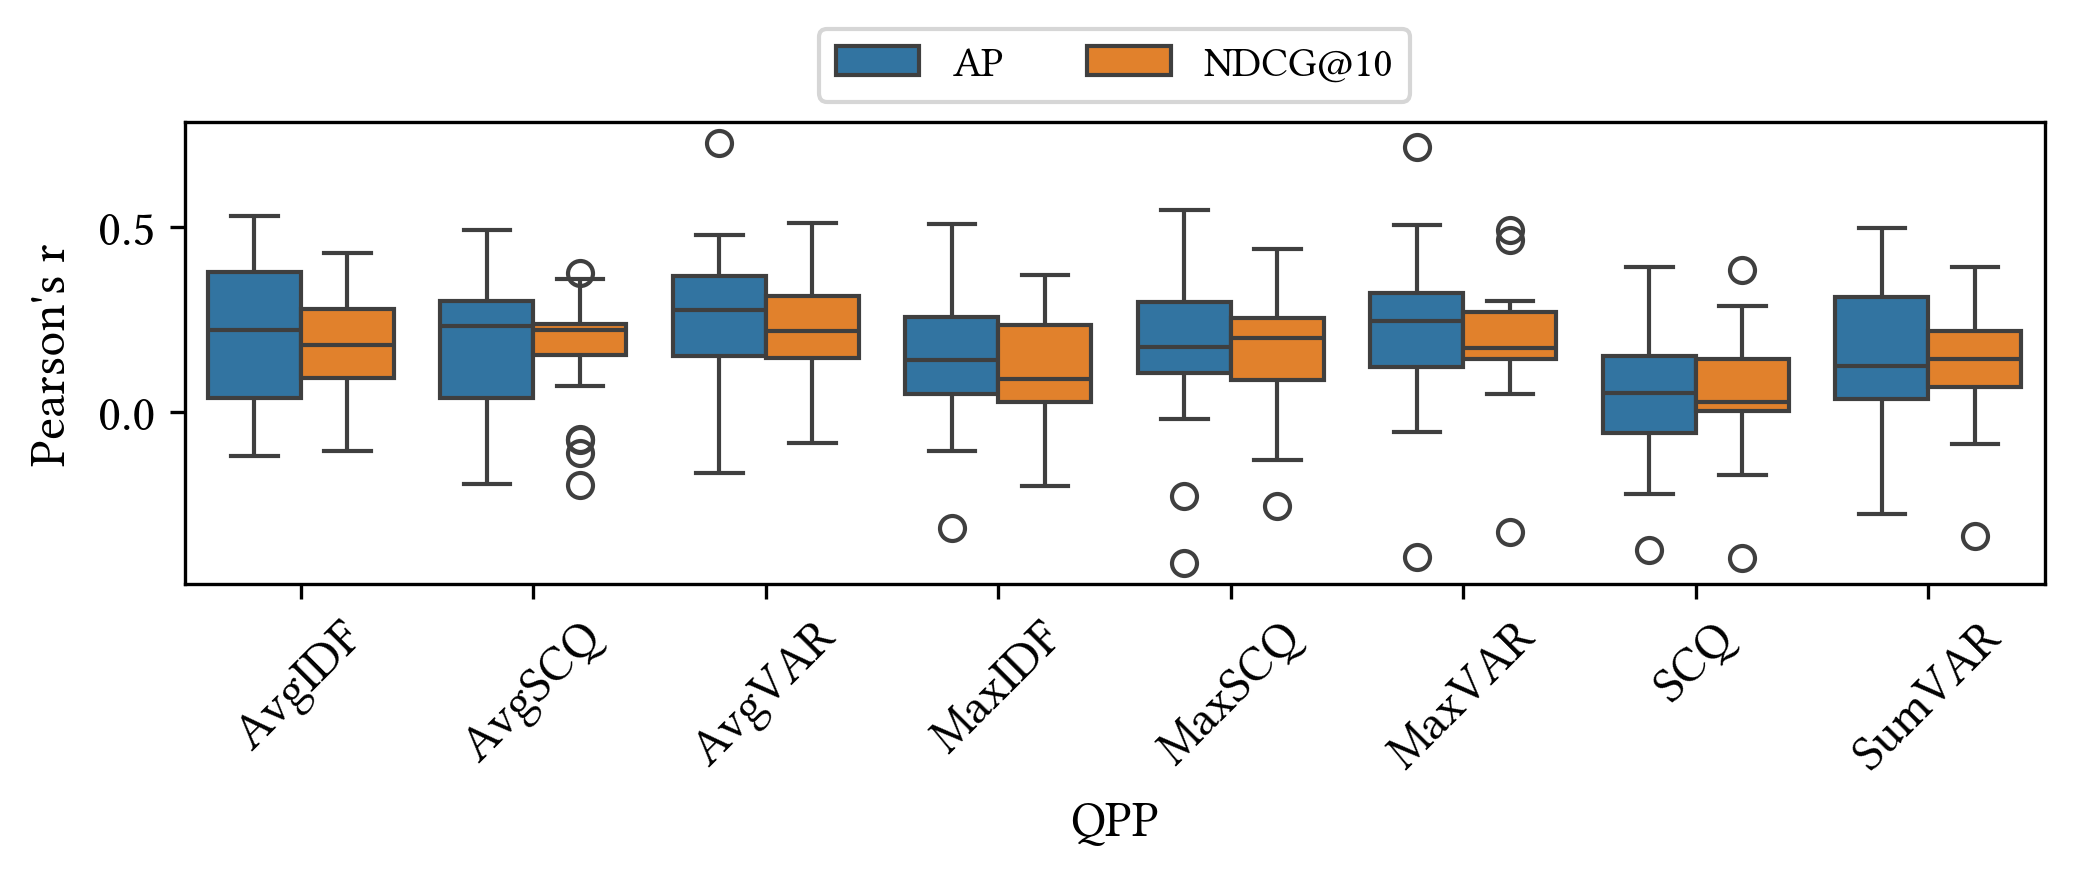

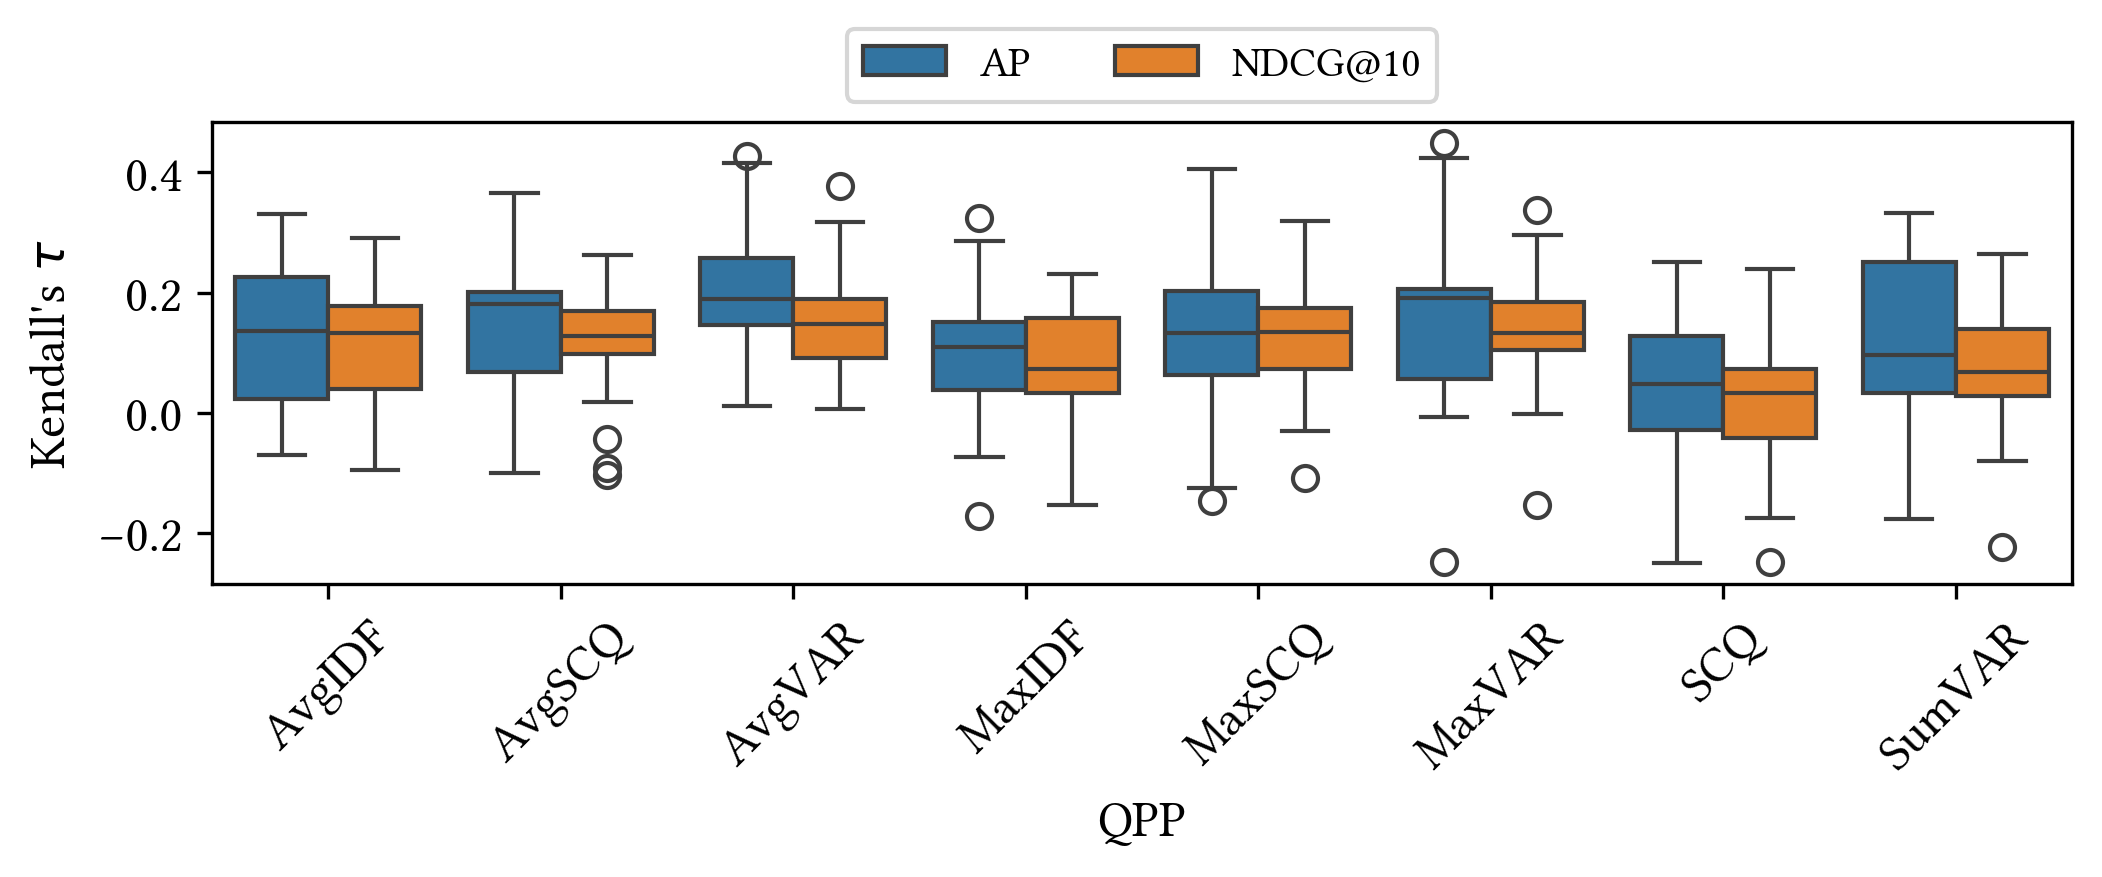

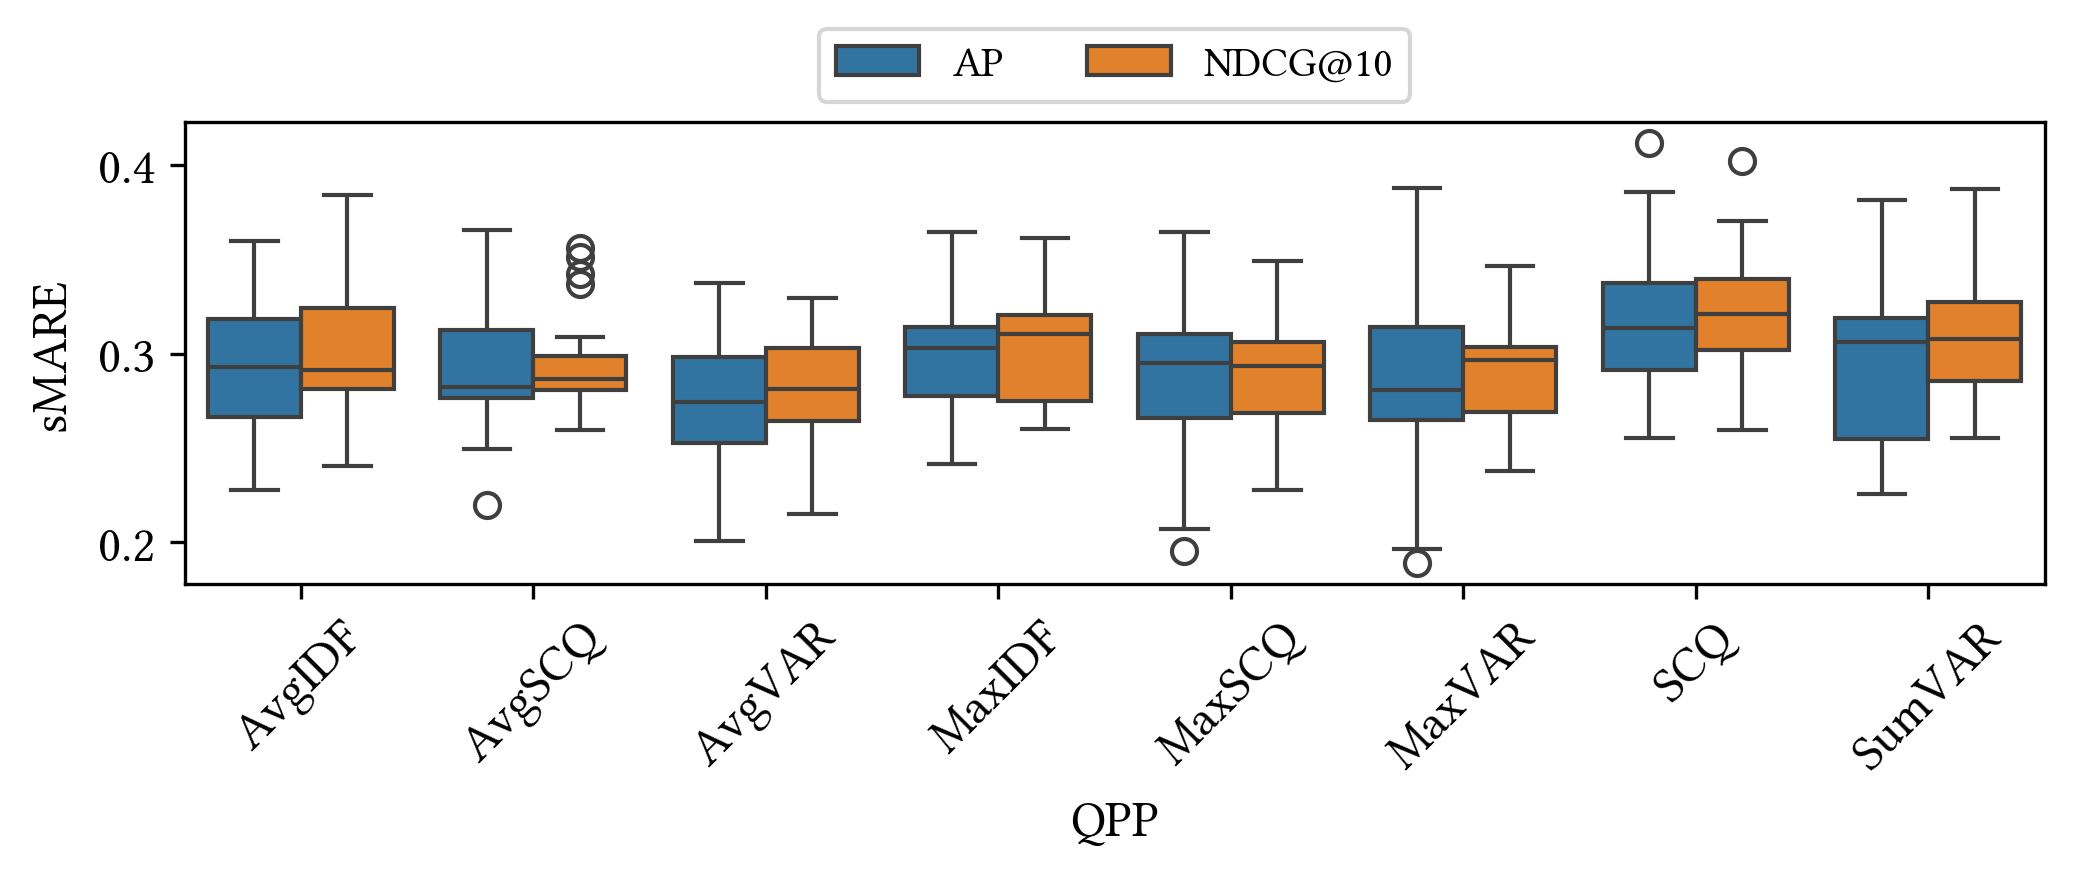

In [15]:
plot_pre_qpp_boxplot(pearson_df, pre_ret_predictors, 'pearson')
plot_pre_qpp_boxplot(kendall_df, pre_ret_predictors, 'kendall')
plot_pre_qpp_boxplot(smare_df, pre_ret_predictors, 'smare')

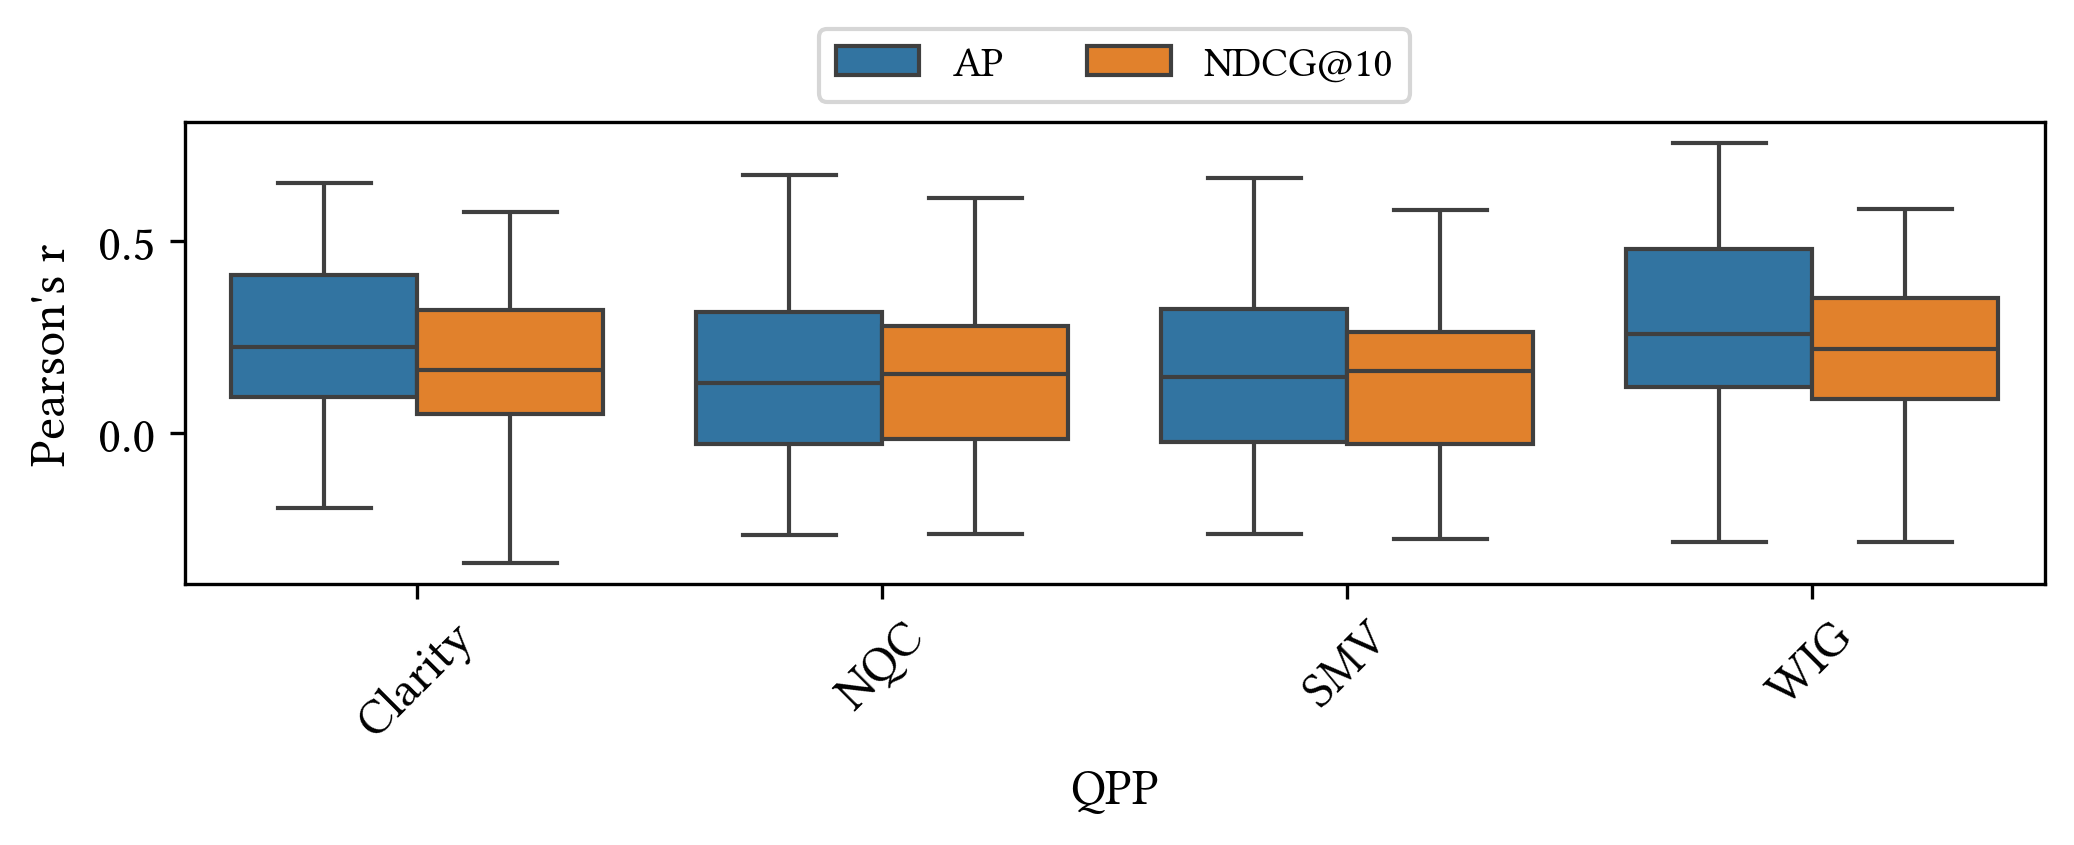

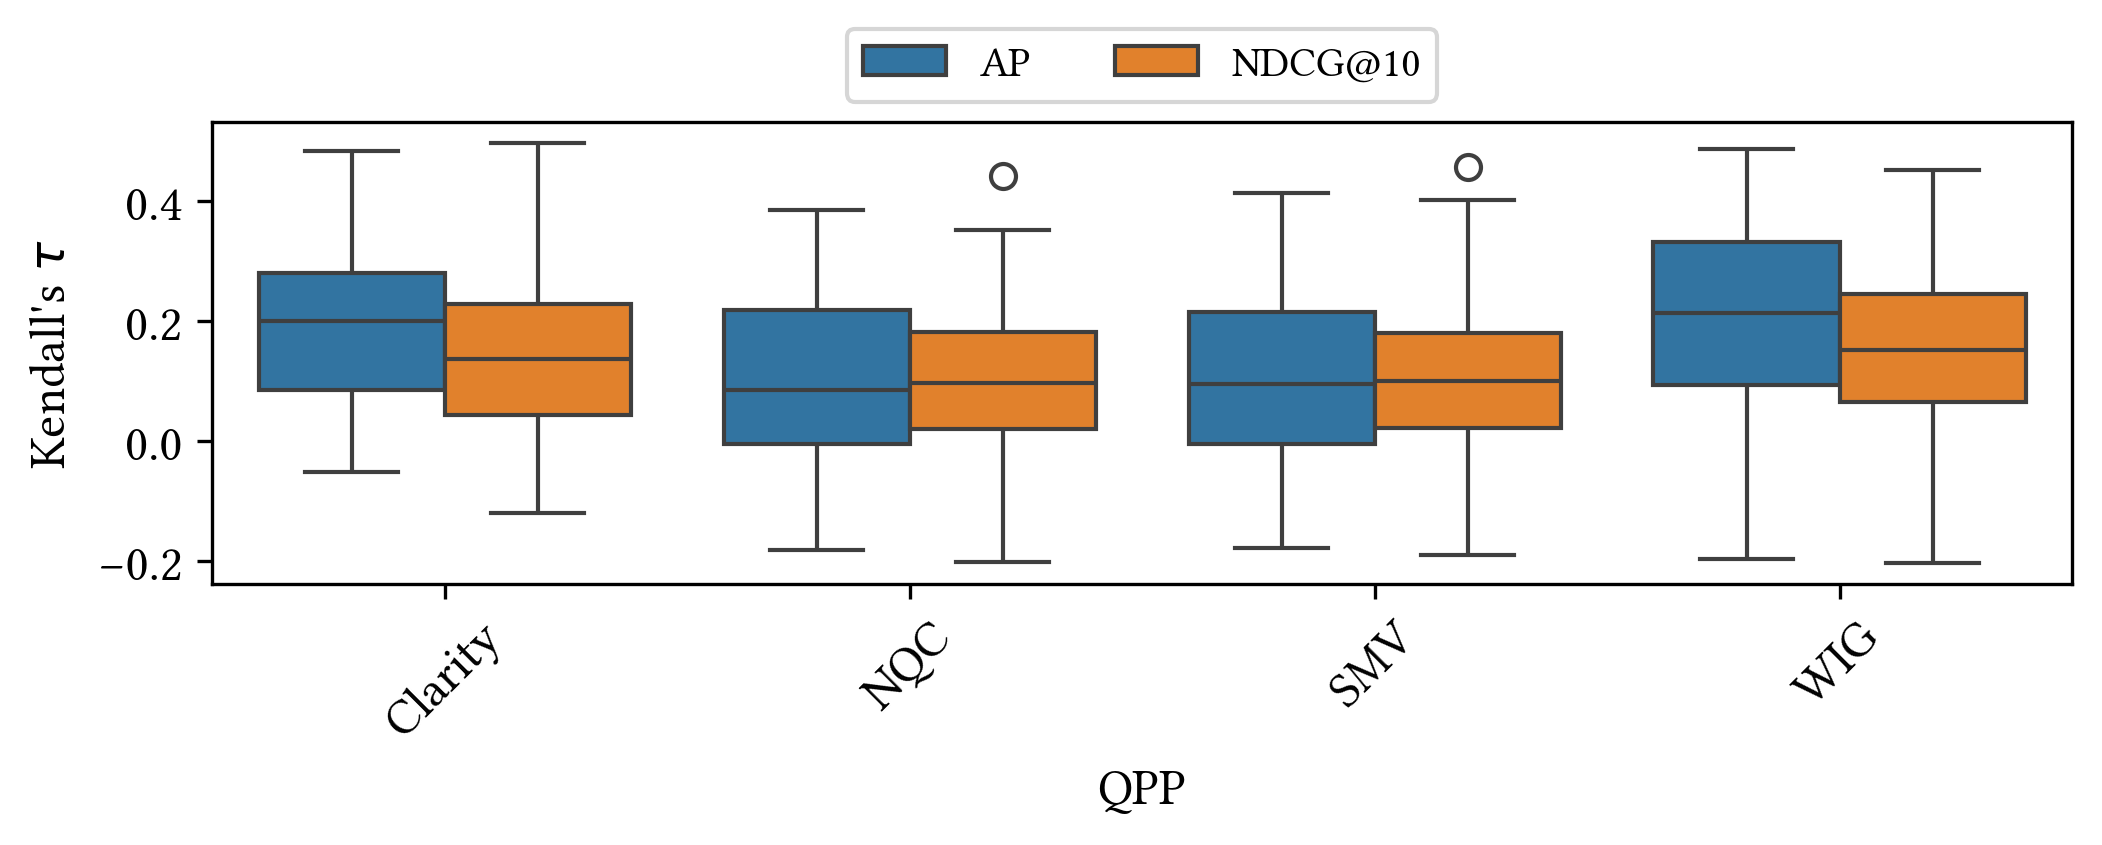

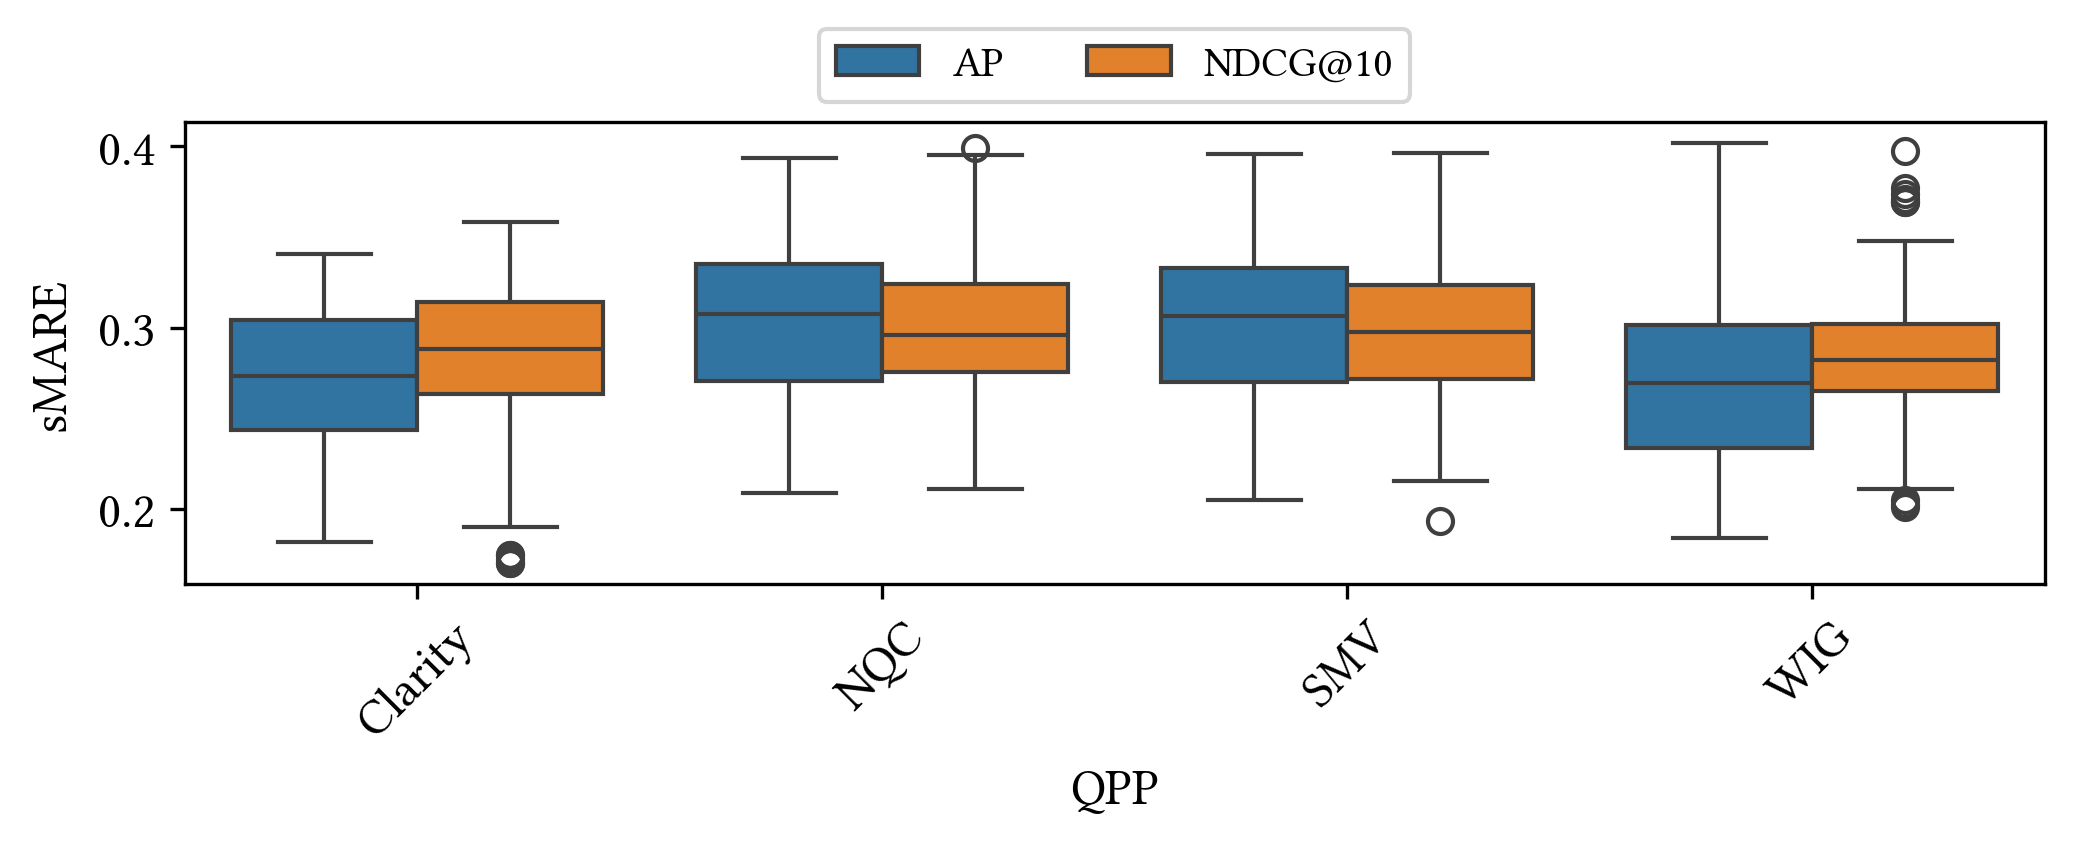

In [16]:
plot_pre_qpp_boxplot(pearson_df, post_ret_predictors, 'pearson')
plot_pre_qpp_boxplot(kendall_df, post_ret_predictors, 'kendall')
plot_pre_qpp_boxplot(smare_df, post_ret_predictors, 'smare')

In [17]:
sns.catplot(data=pearson_df.loc[pearson_df['QPP'].isin(pre_ret_predictors)].sort_values(['measure', 'dataset']),
            x='QPP', y='pearson', hue='measure', col='dataset', col_wrap=3)
plt.show()

In [18]:
# pre_order

In [19]:
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import RepeatedKFold
# 
# corr_method = 'pearson'
# n_splits = 2
# results_per_dataset = {}
# for dataset, _df in df_eval.groupby('dataset'):
# # print(dataset)
# # split df into two sets
# train_df, test_df = train_test_split(_df, shuffle=False, random_state=1609, test_size=0.5)
# rkf = RepeatedKFold(n_splits=n_splits, n_repeats=2, random_state=1609)
# # correlate with the effectivnness metric
# # p_corrs = train_df.iloc[:, 5:].corrwith(train_df['value'])
# _res_pre_fold = []
# _res_vector = []
# for i, (train_index, test_index) in enumerate(rkf.split(_df)):
#     p_corrs = _df.iloc[train_index].iloc[:, 5:].corrwith(_df.iloc[train_index]['value'], method=corr_method)
# _pre = _df.iloc[test_index][pre_ret_predictors].corrwith(_df.iloc[test_index]['value'], method=corr_method)
# for pred in post_ret_predictors:
#     train_best = p_corrs.loc[p_corrs.index.str.startswith(pred)].idxmax()
# if i % 2 == 0:
#     _
# _df.iloc[test_index][train_best].corr(_df.iloc[test_index]['value'], method=corr_method)
# 
# # _res_pre_fold.append(_df.iloc[test_index][pre_ret_predictors.tolist() + train_best].corrwith(_df.iloc[test_index]['value']))
# # if i%2 == 1:
# #     _res_vector.append(pd.concat(_res_pre_fold, axis=1).mean(1))

In [20]:
# from collections import defaultdict
# 
# _post_pred_res = defaultdict(list)
# for i, (train_index, test_index) in enumerate(rkf.split(_df)):
#     p_corrs = _df.iloc[train_index].iloc[:, 5:].corrwith(_df.iloc[train_index]['value'], method=corr_method)
# _pre = _df.iloc[test_index][pre_ret_predictors].corrwith(_df.iloc[test_index]['value'], method=corr_method)
# for pred in post_ret_predictors:
#     train_best = p_corrs.loc[p_corrs.index.str.startswith(pred)].idxmax()
# _t_corr = _df.iloc[test_index][train_best].corr(_df.iloc[test_index]['value'], method=corr_method)
# _post_pred_res[pred] += [_t_corr]
# _post_pred_res